# 2-Level Full Factorial
## Analizing Data

# Preliminaries
## Importing packages

In [120]:
import numpy as np
import pandas as pd
import itertools as it

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [121]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-21 12:10:42.954698


## Reading DOE data

In [122]:
doe = pd.read_pickle('./EA_A_05_data.gz', compression='gzip')

In [123]:
doe.head()

,pop_s,b,mut_p,mut_s,p_sel,s_sel,f_min_MEAN,f_max_MEAN,f_mean_MEAN,f_std_MEAN
0,-1,-1.0,-1.0,-1.0,-1,-1,0.770816,0.779056,0.775203,0.003117
1,-1,-1.0,-1.0,-1.0,-1,1,0.901820,0.916325,0.912887,0.005835
2,-1,-1.0,-1.0,-1.0,1,-1,0.694523,0.709522,0.703910,0.006153
3,-1,-1.0,-1.0,-1.0,1,1,0.676936,0.689657,0.681660,0.004524
4,-1,-1.0,-1.0,1.0,-1,-1,0.757939,0.757939,0.757939,0.000000


In [124]:
list(doe.columns[0:6])

['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']

# DOE Analisis of Data
## Defining variables and variable labels

In [125]:
labels = {}
labels[1] = list(doe.columns[0:6])
for i in [2,3,4,5,6]:
    labels[i] = list(it.combinations(labels[1], i))

obs_list = list(doe.columns[-4:-1])

for k in labels.keys():
    print(str(k) + " : " + str(labels[k]))
print()
print(obs_list)

1 : ['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']
2 : [('pop_s', 'b'), ('pop_s', 'mut_p'), ('pop_s', 'mut_s'), ('pop_s', 'p_sel'), ('pop_s', 's_sel'), ('b', 'mut_p'), ('b', 'mut_s'), ('b', 'p_sel'), ('b', 's_sel'), ('mut_p', 'mut_s'), ('mut_p', 'p_sel'), ('mut_p', 's_sel'), ('mut_s', 'p_sel'), ('mut_s', 's_sel'), ('p_sel', 's_sel')]
3 : [('pop_s', 'b', 'mut_p'), ('pop_s', 'b', 'mut_s'), ('pop_s', 'b', 'p_sel'), ('pop_s', 'b', 's_sel'), ('pop_s', 'mut_p', 'mut_s'), ('pop_s', 'mut_p', 'p_sel'), ('pop_s', 'mut_p', 's_sel'), ('pop_s', 'mut_s', 'p_sel'), ('pop_s', 'mut_s', 's_sel'), ('pop_s', 'p_sel', 's_sel'), ('b', 'mut_p', 'mut_s'), ('b', 'mut_p', 'p_sel'), ('b', 'mut_p', 's_sel'), ('b', 'mut_s', 'p_sel'), ('b', 'mut_s', 's_sel'), ('b', 'p_sel', 's_sel'), ('mut_p', 'mut_s', 'p_sel'), ('mut_p', 'mut_s', 's_sel'), ('mut_p', 'p_sel', 's_sel'), ('mut_s', 'p_sel', 's_sel')]
4 : [('pop_s', 'b', 'mut_p', 'mut_s'), ('pop_s', 'b', 'mut_p', 'p_sel'), ('pop_s', 'b', 'mut_p', 's_sel'), ('pop_s'

## Computing Main and Interaction Effects

### Constant Effect

In [126]:
effects = {}

# Start with the constant effect: this is $\overline{y}$
effects[0] = {'x0' : [doe['f_min_MEAN'].mean(), doe['f_max_MEAN'].mean(), doe['f_mean_MEAN'].mean()]}
print(effects[0])

{'x0': [0.3960328834419379, 0.6637013443380954, 0.4586288830581633]}


### Main effect of each variable

In [127]:
effects[1] = {}
for key in labels[1]:
    effects_result = []
    for obs in obs_list:
        effects_df = doe.groupby(key)[obs].mean()
        result = sum([ zz*effects_df.loc[zz] for zz in effects_df.index ])
        effects_result.append(result)
    effects[1][key] = effects_result

effects[1]

{'pop_s': [-0.19476368145641887, -0.048831069924294424, -0.18366205485179915],
 'b': [-0.15888041309413525, 0.13118341337660921, -0.05671874500131602],
 'mut_p': [-0.1572657078565171, 0.3485318318399069, -0.03789080268303768],
 'mut_s': [0.18267452362825637, 0.49903849339591133, 0.25489944568102646],
 'p_sel': [-0.01966187850054757, -0.03519995288317812, -0.022930389651859395],
 's_sel': [0.052780218138965385, 0.32837456114641056, 0.1561959939133839]}

### Interaction effects (2-variable to 6-variable interactions)

In [128]:
for c in [2,3,4,5,6]:
    effects[c] = {}
    for key in labels[c]:
        effects_result = []
        for obs in obs_list:
            effects_df = doe.groupby(key)[obs].mean()
            result = sum([ np.prod(zz)*effects_df.loc[zz]/(2**(len(zz)-1)) for zz in effects_df.index ])
            effects_result.append(result)
        effects[c][key] = effects_result

C:\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [129]:
def printd(d):
    for k in d.keys():
        print("%25s : %s"%(k,d[k]))

for i in range(1,7):
    printd(effects[i])

                    pop_s : [-0.19476368145641887, -0.048831069924294424, -0.18366205485179915]
                        b : [-0.15888041309413525, 0.13118341337660921, -0.05671874500131602]
                    mut_p : [-0.1572657078565171, 0.3485318318399069, -0.03789080268303768]
                    mut_s : [0.18267452362825637, 0.49903849339591133, 0.25489944568102646]
                    p_sel : [-0.01966187850054757, -0.03519995288317812, -0.022930389651859395]
                    s_sel : [0.052780218138965385, 0.32837456114641056, 0.1561959939133839]
           ('pop_s', 'b') : [0.07330750826841498, 0.1349246769950493, 0.08506775788297138]
       ('pop_s', 'mut_p') : [0.055551669273174314, 0.18653679183958533, 0.06755062423419944]
       ('pop_s', 'mut_s') : [0.04444197674671663, 0.1378419808268691, 0.05333889522185237]
       ('pop_s', 'p_sel') : [0.01718584380166968, 0.03546425662783603, 0.02175621360980709]
       ('pop_s', 's_sel') : [-0.01256796297229315, 0.01787382060872028,

## Analysis of results
### Analyzing Effects

In [130]:
print(len(effects))

7


In [149]:
master_dict = {}
for nvars in effects.keys():

    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = v

master_df = pd.DataFrame(master_dict).T
master_df.columns = obs_list
master_df.head()

,f_min_MEAN,f_max_MEAN,f_mean_MEAN
x0,0.396033,0.663701,0.458629
pop_s,-0.194764,-0.048831,-0.183662
b,-0.158880,0.131183,-0.056719
mut_p,-0.157266,0.348532,-0.037891
mut_s,0.182675,0.499038,0.254899


In [157]:
y1 = master_df['f_min_MEAN'].copy()
y1 = y1.iloc[y1.abs().argsort].iloc[::-1]

print("Top 10 effects for observable 'minimum fitness:'")
print(y1[:10])

Top 10 effects for observable 'minimum fitness:'
x0                0.396033
pop_s            -0.194764
mut_s             0.182675
b                -0.158880
mut_p            -0.157266
(pop_s, b)        0.073308
(b, mut_p)        0.064599
(pop_s, mut_p)    0.055552
s_sel             0.052780
(b, s_sel)        0.046488
Name: f_min_MEAN, dtype: float64


In [167]:
y2 = master_df['f_mean_MEAN'].copy()
y2 = y2.iloc[y2.abs().argsort].iloc[::-1]

print("Top 10 effects for observable 'mean fitness:'")
print(y2[:10])

Top 10 effects for observable 'mean fitness:'
x0                       0.458629
mut_s                    0.254899
pop_s                   -0.183662
(b, mut_p)               0.167176
s_sel                    0.156196
(b, s_sel)               0.137868
(b, mut_p, s_sel)        0.111658
(mut_p, s_sel)           0.110791
(mut_s, s_sel)           0.103356
(mut_p, mut_s, s_sel)    0.102903
Name: f_mean_MEAN, dtype: float64


### Main effects plot

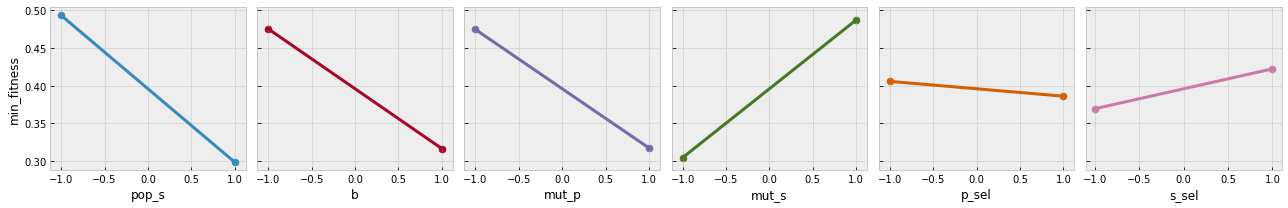

In [166]:
variable = ['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']
f, axs = plt.subplots(1, 6, figsize=(18,3), sharey=True)
x_ci=None
for i in range(len(variable)):
        sns.regplot(x=variable[i], y='f_min_MEAN', data=doe, x_estimator=np.mean, x_ci=x_ci, ci=None, truncate=True, ax=axs[i])
for ax in axs.flat:
    ax.set_ylabel(None)
axs[0].set_ylabel('min_fitness')
plt.tight_layout()

### Interaction effects plot

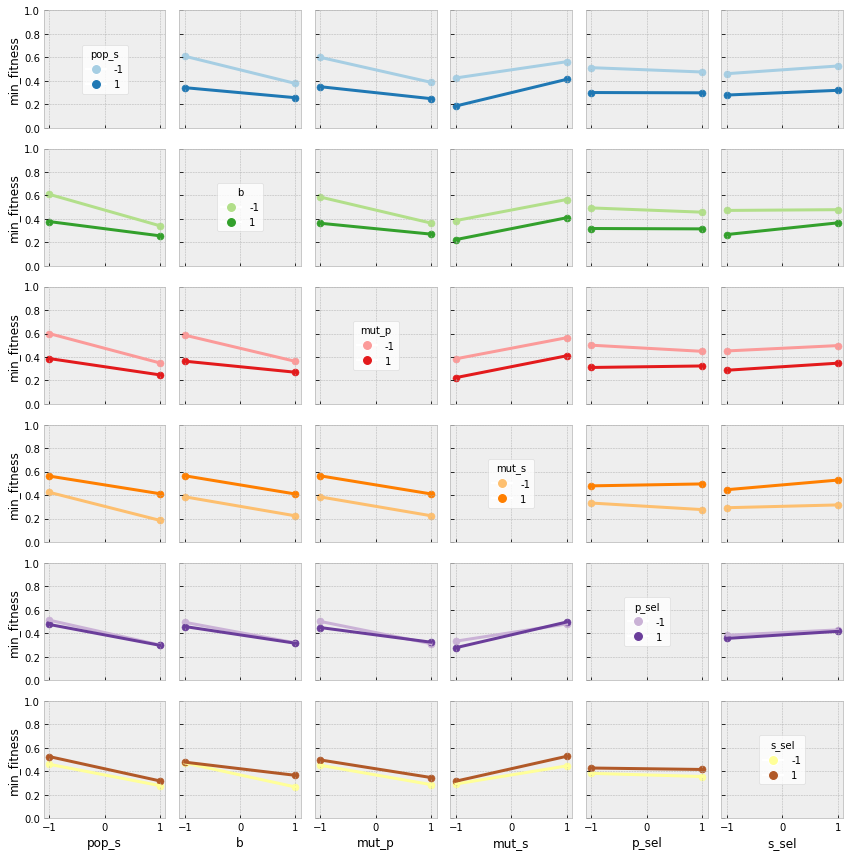

In [165]:
factors = ['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']
f, axs = plt.subplots(6, 6, figsize=(12, 12), sharey=True, sharex=True)
x_ci = None

# set palette 
palette = it.cycle(sns.color_palette("Paired"))

for i in range(len(factors)):
    for j in range(len(factors)):
        yy = factors[j]
        
        c = next(palette)
        sns.regplot(x=factors[i], y='f_min_MEAN', data=doe[doe[yy]==-1], label='-1', x_estimator=np.mean, color=c, x_ci=x_ci, ci=None, truncate=True, ax=axs[j,i])
        c = next(palette)
        sns.regplot(x=factors[i], y='f_min_MEAN', data=doe[doe[yy]==1], label='1', x_estimator=np.mean, color=c, x_ci=x_ci, ci=None, truncate=True, ax=axs[j,i])
        
        #axs[j,i].legend(title=yy,facecolor='white')

        if i==j:
            axs[j,i].clear()

for ax in axs.flat:
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
axs[0,0].set_xlim((-1.1, 1.1))

from matplotlib.lines import Line2D

for i in range(len(factors)):
    axs[i,0].set_ylabel('min_fitness')
    axs[-1,i].set_xlabel(factors[i])
    legend_elements = [ Line2D([0], [0], marker='o', color='w', label=-1, markerfacecolor=next(palette), markersize=10),
                       Line2D([0], [0], marker='o', color='w', label=1, markerfacecolor=next(palette), markersize=10)]
    axs[i,i].legend(handles=legend_elements, loc='center', title=factors[i], facecolor='white')
    
plt.tight_layout()
plt.show()

### Quantile-Quantile Effects Plot

Text(0.5, 1.0, 'y2')

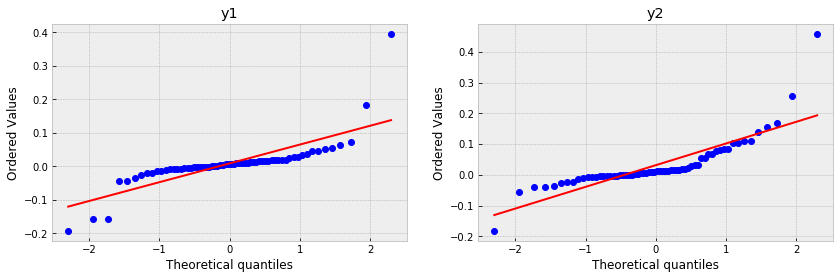

In [138]:
# Quantify which effects are not normally distributed, 
# to assist in identifying important variables

fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

stats.probplot(y1, dist="norm", plot=ax1)
ax1.set_title('y1')

stats.probplot(y2, dist="norm", plot=ax2)
ax2.set_title('y2')

In [12]:
query = (multi_fit['generation']==gen_f)
multi_final_fitness_res = multi_fit[query].apply(pd.to_numeric)

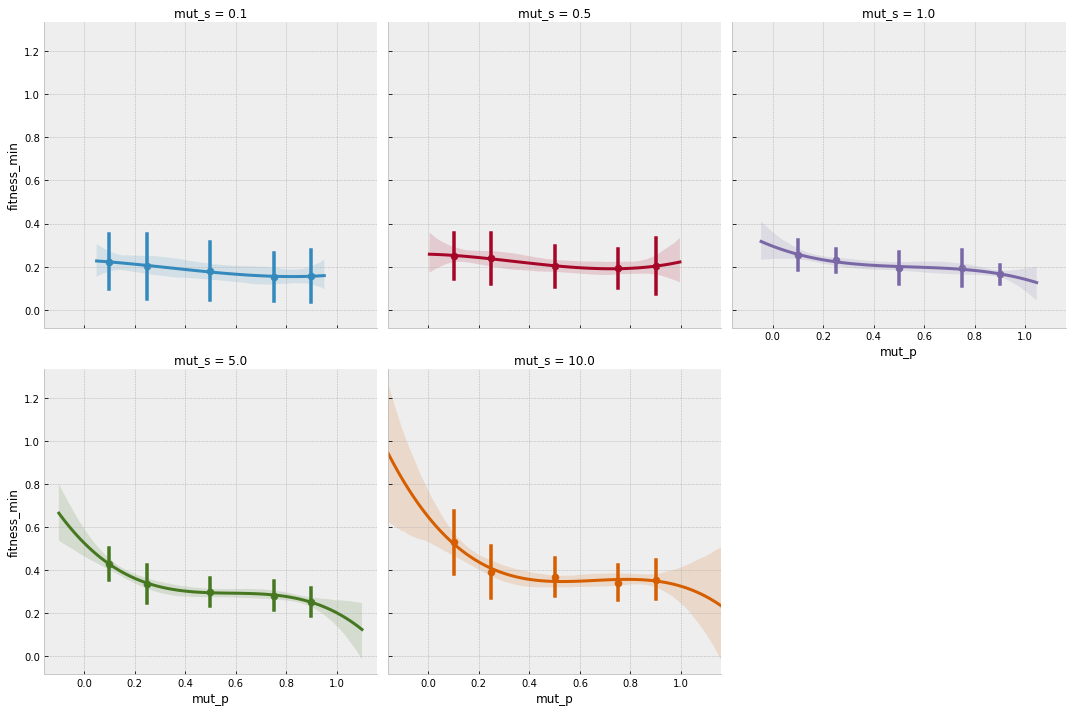

In [13]:
sns.lmplot(x='mut_p', y='fitness_min', order=3, data=multi_final_fitness_res,hue='mut_s', col='mut_s', x_bins=5, col_wrap=3, x_ci='sd')

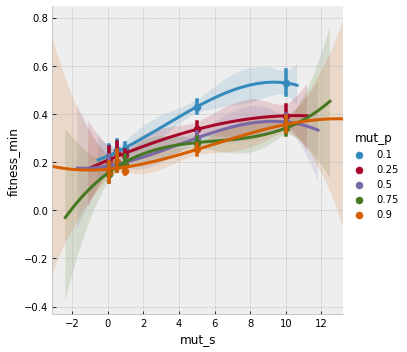

In [14]:
sns.lmplot(x='mut_s', y='fitness_min', order=3, data=multi_final_fitness_res,hue='mut_p', x_bins=5)

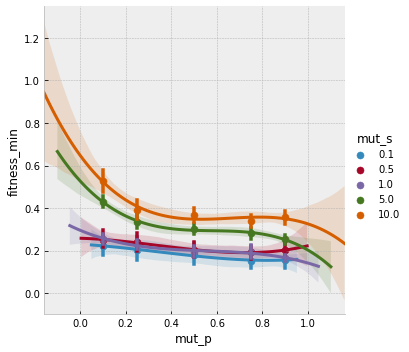

In [15]:
sns.lmplot(x='mut_p', y='fitness_min', order=3, data=multi_final_fitness_res,hue='mut_s', x_bins=5)

In [16]:
time_c = datetime.datetime.now()
print(time_c)
print(time_c-time_a)

2019-05-12 16:18:59.089603
0:17:18.365861


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

encoded_inputs = list( it.product([-1, 1], [-1, 1], [-1, 1]) )
doe = pd.DataFrame(encoded_inputs, columns=['x1', 'x2', 'x3'])
doe['y1'] = doe.apply( lambda z : sum([ np.random.rand()*z["x%d"%(i)]+0.01*(0.5-np.random.rand()) for i in range(1,3) ]), axis=1)
print(doe)



   x1  x2  x3        y1
0  -1  -1  -1 -1.265385
1  -1  -1   1 -1.600881
2  -1   1  -1 -0.117767
3  -1   1   1 -0.031947
4   1  -1  -1 -0.157319
5   1  -1   1  0.230671
6   1   1  -1  1.405522
7   1   1   1  1.096237


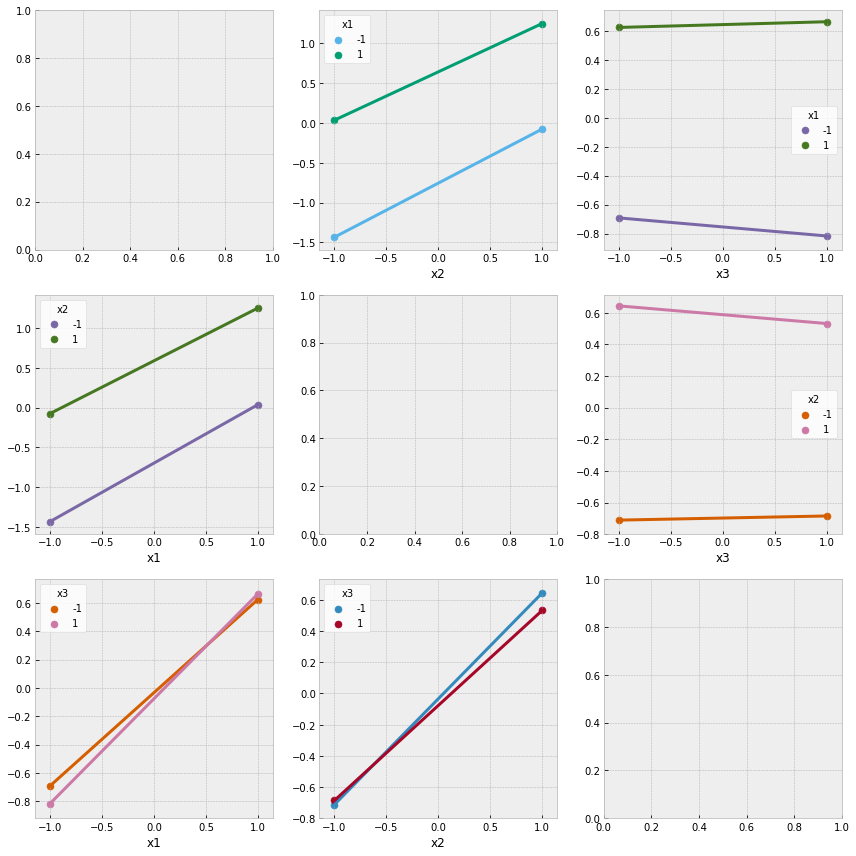

In [118]:
factors = ['x1', 'x2', 'x3']
f, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(len(factors)):
    for j in range(len(factors)):
        yy = factors[j]
        
        with sns.color_palette('Paired'):
            sns.regplot(x=factors[i], y='y1', data=doe[doe[yy]==-1], label='-1', x_estimator=np.mean, ci=None, truncate=True, ax=axs[j,i])
            sns.regplot(x=factors[i], y='y1', data=doe[doe[yy]==1], label='1', x_estimator=np.mean, ci=None, truncate=True, ax=axs[j,i])
        
        axs[j,i].legend(title=yy,facecolor='white')

        if i==j:
            axs[j,i].clear()

for ax in axs.flat:
    ax.set_ylabel(None)

plt.tight_layout()
plt.show()